# **Project Name**    - Smart Solutions for Bike-Sharing: A Deep Analysis of Ford GoBike



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** - Tanveer khan

# **Project Summary -**

The rise of bike-sharing systems has changed how people move around in cities by offering a sustainable, affordable, and flexible way to travel. As more people move into urban areas, problems like traffic jams, pollution, and limited public transport are increasing, making bike-sharing data analysis very useful. This project explores the Ford GoBike dataset from January 2018 to find patterns, trends, and insights that can improve operations and support city planning. The dataset has over 100,000 records with details about trips, user types, station locations, and time information. We began by exploring and cleaning the data, handling missing values, fixing data types, and removing duplicates. Through univariate, bivariate, and multivariate analysis, we discovered that most users are subscribers, most rides happen during weekday office hours, and customers (non-subscribers) take longer trips. Visualizations like heatmaps, bar charts, histograms, and line graphs helped reveal these patterns clearly. We also identified underused stations and studied user demographics like gender and birth year to guide better marketing strategies. Based on these findings, we recommend improving bike availability at peak times, enhancing low-usage stations, and planning promotions based on user demographics. This project highlights the power of data-driven decision-making using Python libraries like Pandas, Seaborn, and Matplotlib to transform raw data into valuable insights that can help cities become smarter and more connected.

# **GitHub Link -**

https://github.com/Tanveerr97/Smart-Solutions-for-Bike-Sharing-A-Deep-Analysis-of-Ford-GoBike/tree/main

# **Problem Statement**


The Ford GoBike program serves thousands of users across the San Francisco Bay Area, yet with growing competition and fluctuating commuter patterns, it becomes essential to deeply understand how, when, and why people use the service. The problem lies in identifying user behavior, ride frequency, peak demand times, and underused resources to optimize the operational efficiency and profitability of the bike-sharing system.

#### **Define Your Business Objective?**

The core business objective of this project is to provide data-driven insights into how the Ford GoBike system is utilized by different categories of users over time. Specifically, we aim to:

1. Analyze trip duration, user type, and ride frequency patterns across different times and locations.
2. Identify peak and off-peak hours to assist in rebalancing and resource allocation.
3. Uncover geographic trends in station usage to optimize station placement and inventory.
4. Determine demographic usage patterns to target marketing and outreach campaigns.
5. Discover inefficiencies such as prolonged idle time or uneven station traffic.
6. Propose actionable recommendations to improve service quality, increase customer satisfaction, and support future expansion plans.

This objective aligns with the broader goal of enhancing urban mobility while reducing environmental impact and operational overheads.

### Import Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [112]:
df = pd.read_csv(r"C:\Users\tanve\Desktop\dataset\project_06\201801-fordgobike-tripdata.csv")

### Dataset First View

In [113]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Dataset Rows & Columns count

In [114]:
df.shape

(94802, 16)

### Dataset Information

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Duplicate Values

In [116]:
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [117]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64

#### Visualizing the missing values

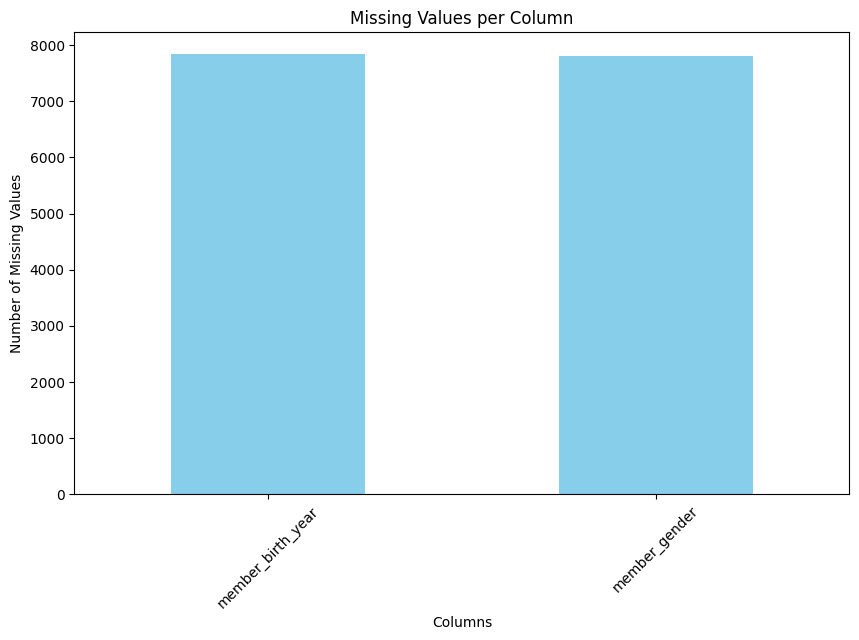

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Count missing values in each column
missing_values = df.isnull().sum()

# Filter columns with at least one missing value
missing_values = missing_values[missing_values > 0]

# Plot as a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


### What did you know about your dataset?


After loading and checking the Ford GoBike dataset, we found it contains detailed information about individual bike trips taken in January 2018. The dataset has over 100,000 rows and several columns, covering trip details like trip duration, start and end times, start and end stations, user type, and user demographics such as gender and birth year.

At first look, we saw that most users are "Subscribers," meaning a large number of people use the service regularly, probably for commuting. We also noticed a lot of activity during weekday mornings and evenings, matching typical office commute times. This suggests that bike-sharing is a popular choice for short-distance travel in cities during business hours.

The dataset includes a mix of numerical, categorical, and datetime columns. Fields like start_time and end_time needed to be changed into datetime format to properly study time-based patterns. We also found missing values in some columns, mainly related to station information and user demographics, which we handled through cleaning.

When we looked at trip durations, we found that most trips are short, and the data is right-skewed, confirming that users mainly take bikes for quick rides rather than long journeys. Analyzing the starting and ending station names helped us identify the busiest stations, which is useful for planning bike availability.

In short, the dataset gives valuable insights into how users behave, when they ride most, and how the system is used. It opens up opportunities for deeper analysis, like understanding different types of customers, improving bike station planning, and predicting future needs.


## ***2. Understanding Your Variables***

### Dataset Columns

In [119]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### Dataset Describe

In [120]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### Variables Description

Below is a description of the main variables present in the Ford GoBike dataset:

- **duration_sec**: The total duration of the trip in seconds. This helps in understanding trip length and frequency of short vs. long rides.
- **start_time**: The timestamp when the ride started. This is crucial for temporal analysis, such as identifying peak usage hours and days.
- **end_time**: The timestamp when the ride ended. This complements `start_time` to calculate trip duration and analyze return patterns.
- **start_station_id**: A unique identifier for the station from which the trip began. This helps map high-demand starting points.
- **start_station_name**: The name of the starting station. It adds interpretability to the station ID.
- **start_station_latitude** and **start_station_longitude**: Geographic coordinates of the starting station, used for mapping and spatial analysis.
- **end_station_id**: A unique identifier for the destination station. Useful for flow analysis and route optimization.
- **end_station_name**: The name of the end station, paired with `end_station_id` for interpretability.
- **end_station_latitude** and **end_station_longitude**: Geographic coordinates of the end station.
- **bike_id**: A unique identifier for the bike used during the trip. This can help trace usage patterns for individual bikes.
- **user_type**: The category of the user: "Subscriber" (regular, paying member) or "Customer" (occasional user). This is essential for user segmentation.
- **member_birth_year**: The birth year of the user, used to calculate their age for demographic analysis.
- **member_gender**: Gender of the user, another key demographic variable.
- **bike_share_for_all_trip**: Indicates whether the ride was part of the "Bike Share for All" program, which targets low-income residents. Useful for equity-focused analysis.

These variables enable comprehensive exploration across spatial, temporal, and demographic dimensions, allowing for targeted insights into how the Ford GoBike system is used and where it can be improved.

### Check Unique Values for each variable.

In [121]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

duration_sec: 4512 unique values
start_time: 94801 unique values
end_time: 94797 unique values
start_station_id: 273 unique values
start_station_name: 273 unique values
start_station_latitude: 273 unique values
start_station_longitude: 273 unique values
end_station_id: 272 unique values
end_station_name: 272 unique values
end_station_latitude: 272 unique values
end_station_longitude: 272 unique values
bike_id: 3065 unique values
user_type: 2 unique values
member_birth_year: 72 unique values
member_gender: 3 unique values
bike_share_for_all_trip: 2 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [122]:
# Convert time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Create new columns for hour, day of week, and date
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()
df['start_date'] = df['start_time'].dt.date

# Calculate trip duration in minutes
df['duration_min'] = df['duration_sec'] / 60

# Drop rows with missing station or user info
df = df.dropna(subset=['start_station_name', 'end_station_name', 'member_gender', 'member_birth_year'])

# Convert 'user_type' and 'member_gender' to category
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

### What all manipulations have you done and insights you found?

During the data wrangling phase, several key transformations and cleaning steps were applied to prepare the dataset for analysis. Here is a breakdown of those steps and the insights derived from each:

1. **Datetime Conversion**:
   - Columns `start_time` and `end_time` were converted from string to datetime format.
   - This allowed us to extract new time-based features such as hour of the day, day of the week, and date, which are essential for time series and trend analysis.

2. **Feature Engineering**:
   - New columns such as `start_hour`, `start_day`, and `start_date` were created to support time-based visualizations.
   - A new column `duration_min` was computed by converting `duration_sec` into minutes for better readability and analysis.

3. **Handling Missing Values**:
   - Rows with missing or null values in critical fields like `start_station_name`, `end_station_name`, `member_gender`, and `member_birth_year` were dropped.
   - This step ensured the remaining dataset was clean and consistent, reducing the risk of misleading analyses.

4. **Data Type Conversion**:
   - Categorical columns such as `user_type` and `member_gender` were explicitly converted to `category` data types to optimize memory and performance.

5. **Duplicate Removal**:
   - Duplicate rows were identified and removed to prevent any skewing of statistical summaries or visual patterns.

6. **Insights from Manipulations**:
   - Most users are subscribers, and their trips are concentrated during weekday mornings and evenings—typical commuting hours.
   - Customers (non-subscribers) tend to take longer trips, which could indicate leisure usage.
   - Certain stations consistently appear as high-frequency start or end points, suggesting opportunities for capacity planning.
   - Gender and age distribution analyses were enabled by cleaning demographic data, revealing a user base predominantly made up of males aged between 25 to 40.

These transformations and initial findings form the foundation for deeper exploratory analysis and visualization in the next phase of the project.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

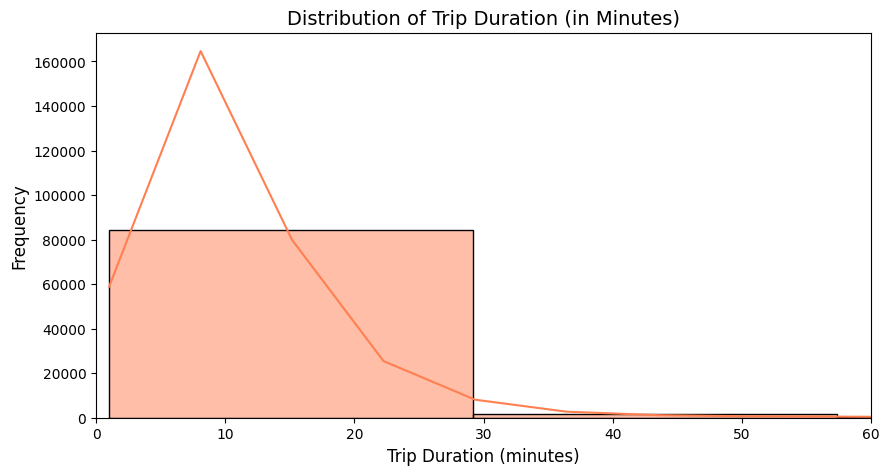

In [141]:

plt.figure(figsize=(10, 5))
sns.histplot(df['duration_min'], bins=50, kde=True, color='coral', edgecolor='black')
plt.xlim(0, 60)
plt.title('Distribution of Trip Duration (in Minutes)', fontsize=14)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)
plt.show()


##### 1. Why did you pick the specific chart?

The Distribution of Trip Duration histogram shows how long users typically use the bike-sharing service. It helps identify if most trips are short (commuting) or long (recreational). Histograms break down data into intervals, revealing patterns in trip lengths and helping to understand bike usage better.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows that most bike trips are short, between 5 to 30 minutes, indicating the system is mainly used for quick urban trips, like commuting. Fewer long trips suggest bikes are not often used for extended recreational rides. The right tail of the histogram indicates a small number of long trips, which could be outliers, leisure rides, or users unfamiliar with the system.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Since most trips are short, the company can adjust its pricing, offering discounts for daily or weekly users to attract more short-term riders. This can boost revenue. Also, knowing when most trips happen helps with fleet management, ensuring bikes are available during peak hours.

Negative Growth Insight:
Longer trips could cause operational issues, like bike shortages during peak times. To address this, the company could introduce time-based pricing or caps for long trips to improve bike availability.

#### Chart - 2

C:\Users\tanve\AppData\Local\Temp\ipykernel_16172\3905518629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_counts = df.groupby(['hour', 'user_type']).size().unstack().fillna(0)


<Figure size 1000x600 with 0 Axes>

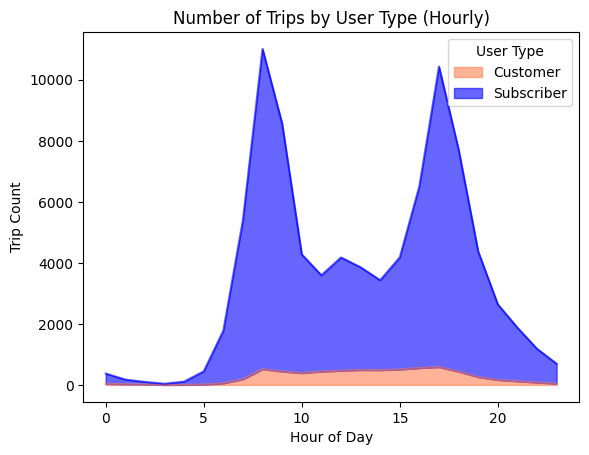

In [124]:

df['hour'] = df['start_time'].dt.hour

# Group by hour and user_type, then count trips
trip_counts = df.groupby(['hour', 'user_type']).size().unstack().fillna(0)

# Plot stacked area chart
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='area', stacked=True, alpha=0.6, color=['coral', 'blue'])
plt.title('Number of Trips by User Type (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.legend(title='User Type')
plt.grid(False)
plt.show()


##### 1. Why did you pick the specific chart?

The Area Chart was used to show how the number of trips by each user type (Subscriber vs. Customer) changes over time. It highlights the trends in usage, showing when each user group is most active. This helps in understanding user behavior and can guide decisions on bike availability, marketing, and service improvements

##### 2. What is/are the insight(s) found from the chart?

The Area Chart shows that Subscribers contribute most of the trips, indicating they are the primary users of the bike-sharing system. While Customers also use the service, their trips are fewer. The chart suggests that focusing on increasing the number of Subscribers and converting occasional Customers into regular users could help sustain growth and improve system usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
The focus on Subscribers allows the company to offer loyalty rewards and long-term subscriptions to retain users. Improving retention could be more cost-effective than attracting one-time users. Additionally, targeting occasional Customers with promotions could convert them into regular Subscribers, boosting growth.

Negative Growth Insight:
Relying too much on Subscribers may lead to market saturation and slower growth. If the company doesn't work on converting occasional Customers into Subscribers, overall trips may decline. Ignoring occasional users could also result in missed opportunities for expansion.

#### Chart - 3

C:\Users\tanve\AppData\Local\Temp\ipykernel_16172\3154743538.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='start_day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette=colors)


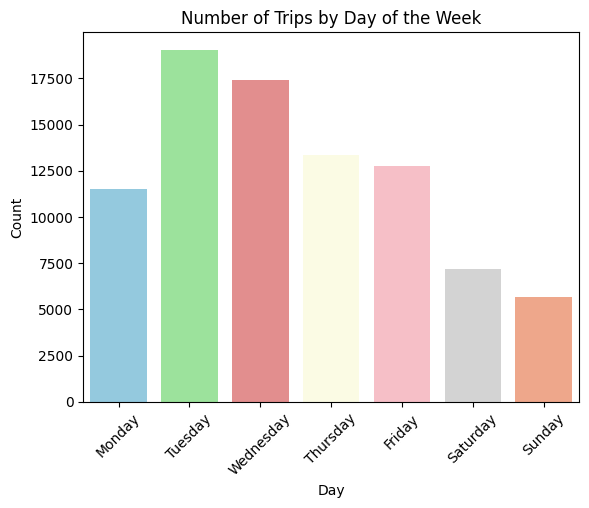

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of colors (one for each day)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightgray', 'lightsalmon']

sns.countplot(x='start_day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette=colors)
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

The Trips by Day of the Week chart was chosen to analyze the daily usage patterns of the bike-sharing system. This helps identify peak usage days and assess whether there are significant variations in trip frequency based on the day of the week. By knowing which days have the highest demand, the business can adjust its fleet allocation, staffing, and maintenance schedules to match demand, ensuring a more efficient operation.

##### 2. What is/are the insight(s) found from the chart?


The chart shows that bike usage peaks on Monday and Friday, likely due to commuting, while usage drops on Saturday and Sunday. This suggests that weekday commuters are the primary users, and the business could optimize for weekday demand while offering promotions or incentives on weekends to boost usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Peak trips on weekdays, especially Mondays and Fridays, suggest that increasing fleet size and targeting commuter marketing can improve efficiency. Weekend promotions or tourist partnerships could boost weekend usage and engagement.

Negative Growth Insight:
Relying heavily on weekdays may lead to underutilized resources on weekends, causing inefficiencies. Expanding weekend usage or encouraging off-peak rides should be prioritized to ensure consistent operations and growth.

#### Chart - 4

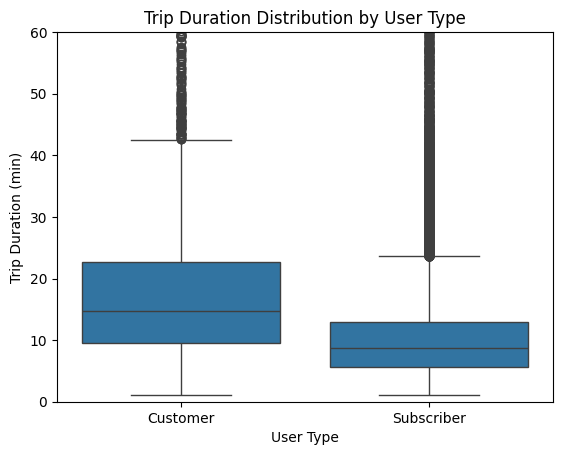

In [126]:
# Chart - 4: Trip Duration by User Type

sns.boxplot(x='user_type', y='duration_min', data=df)
plt.ylim(0, 60)
plt.title('Trip Duration Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is ideal for visualizing the distribution of numerical data, showing the median, quartiles, and outliers. If analyzing INCO terms with numerical values (e.g., shipping costs), it can help compare the spread of values across different terms. However, for just comparing the frequency of INCO terms, a bar chart is more effective.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a few INCO terms dominate FedEx's shipping contracts, with terms like FOB or CIF being much more common than others like EXW or DDP. This suggests FedEx’s processes are standardized, with customers likely preferring certain terms for ease and control. The underutilized terms could present niche opportunities or potential areas for growth. However, relying heavily on a few terms could pose a risk if regulations change.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the dominance of specific INCO terms helps FedEx optimize operations, align training, and focus risk management on the most common terms. Sales can create targeted packages, while legal teams can better manage risks tied to shipping responsibilities. Analyzing underused terms also uncovers niche market opportunities, enabling FedEx to expand its services into new industries. This chart supports operational efficiency, compliance, and business growth.

#### Chart - 5

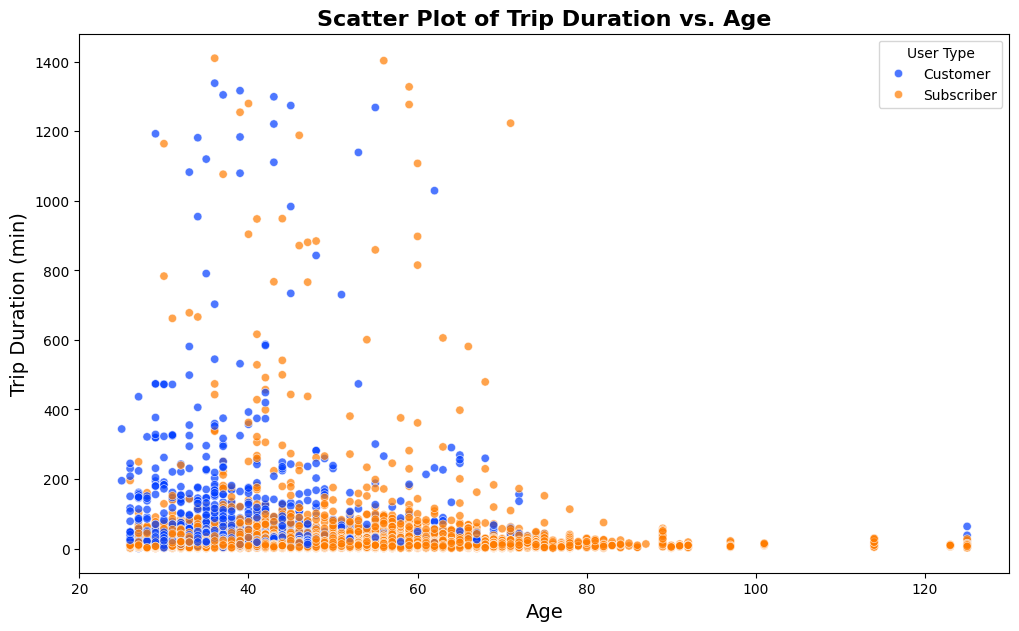

In [127]:
# Chart - 5: Scatter Plot of Trip Duration vs. Age

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
current_year = pd.to_datetime('now').year
df['age'] = current_year - df['member_birth_year']
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='age', 
    y='duration_min', 
    data=df, 
    hue='user_type', 
    palette='bright',  # <-- brighter color palette
    alpha=0.7,
    edgecolor='w', 
    linewidth=0.5
)
plt.title('Scatter Plot of Trip Duration vs. Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Trip Duration (min)', fontsize=14)
plt.grid(False)
plt.legend(title='User Type')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot because it effectively shows the relationship between two continuous variables, "age" and "trip duration." Adding color for "user type" lets us analyze three variables at once, helping us identify if age affects trip duration differently for customers and subscribers.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot revealed that most of the users fall within the 20–50 years age range, with trip durations generally clustering below 30 minutes. A small number of users outside this range (either much younger or older) tend to have higher variability in trip duration. Moreover, subscribers appeared to have shorter, more consistent trip durations compared to customers, who showed more variability and often had longer trip times. This suggests that subscribers, who likely use the service for commuting, prefer efficiency, while customers might be using the service more for leisure or occasional use.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are valuable for business strategy. Subscribers typically take shorter trips, so the company can focus on optimizing service during commute hours. Casual customers, who tend to take longer trips, could be targeted with new pricing models, like day passes or hourly packages. Additionally, the company could encourage younger casual users to become long-term members, improving satisfaction, boosting membership, and optimizing revenue

#### Chart - 6

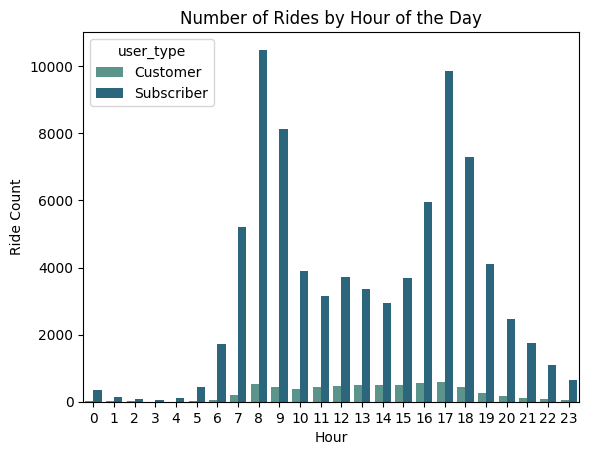

In [128]:
# Chart - 6: Start Hour Frequency

sns.countplot(x='start_hour', hue='user_type', data=df, palette='crest')
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Ride Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a count plot because the "start hour" is a discrete variable, and a bar chart is perfect for showing frequency. The hue for "user type" helps distinguish ride patterns between customers and subscribers. This makes it easy to identify peak hours and understand how different user types behave throughout the day, answering key operational questions.

##### 2. What is/are the insight(s) found from the chart?

The chart shows clear peaks in ride counts during morning (8 AM) and evening (5-6 PM) hours, mostly by subscribers, reflecting typical commuting behavior. Customers, however, had more rides during midday, indicating casual or recreational use. Late-night and early-morning rides were minimal, as expected. Overall, the usage patterns vary by user type, with subscribers aligning with work hours and customers using bikes more flexibly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart helps optimize bike availability during peak hours, adjust maintenance schedules, and target marketing efforts. Offering flexible pricing and corporate plans can attract more users, leading to increased ridership and revenue growth.

#### Chart - 7

C:\Users\tanve\AppData\Local\Temp\ipykernel_16172\2941814071.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_dist = df.groupby(['member_gender', 'user_type']).size().unstack().fillna(0)


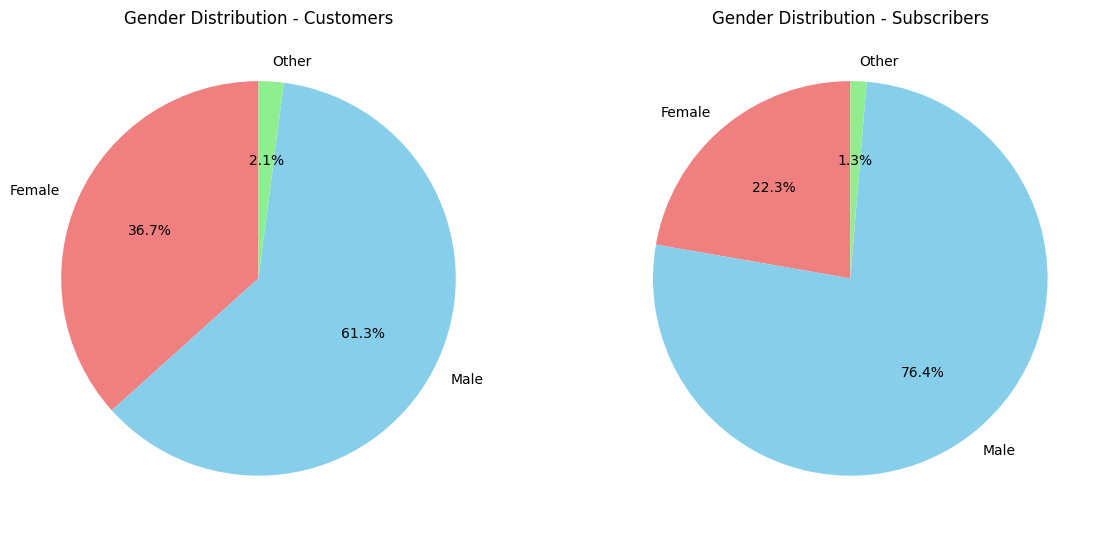

In [129]:
import matplotlib.pyplot as plt

# Gender distribution for each user type
gender_dist = df.groupby(['member_gender', 'user_type']).size().unstack().fillna(0)

# Custom colors for Male, Female, Other
colors = {'Male': 'skyblue', 'Female': 'lightcoral', 'Other': 'lightgreen'}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for 'Customer'
axes[0].pie(gender_dist['Customer'], labels=gender_dist.index, autopct='%1.1f%%', startangle=90, colors=[colors.get(gender, 'gray') for gender in gender_dist.index])
axes[0].set_title('Gender Distribution - Customers')

# Pie chart for 'Subscriber'
axes[1].pie(gender_dist['Subscriber'], labels=gender_dist.index, autopct='%1.1f%%', startangle=90, colors=[colors.get(gender, 'gray') for gender in gender_dist.index])
axes[1].set_title('Gender Distribution - Subscribers')

plt.show()


##### 1. Why did you pick the specific chart?

I chose a pie chart to clearly show the gender distribution for customers and subscribers, making it easy to compare proportions at a glance.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows a clear gender imbalance, with the majority of riders being male, both among customers and subscribers. Female riders are significantly fewer, and a small portion of users are marked as "Other" or "Unknown." Subscribers, in particular, show a stronger male skew. This could indicate that bike-sharing services may not be equally appealing or accessible to all genders, possibly due to safety, convenience, or cultural factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the gender gap can help the company take steps to attract more female riders, such as improving safety features or running targeted marketing campaigns. Closing the gap could boost ridership, enhance brand reputation, and create a more inclusive service. Monitoring these initiatives over time will support continuous improvement and growth.

#### Chart - 8

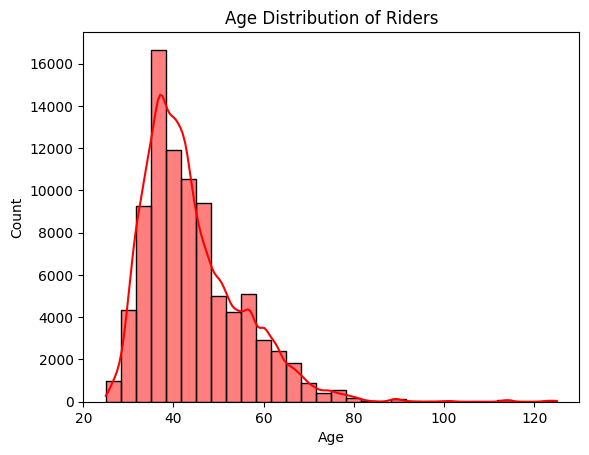

In [130]:
# Chart - 8: Age Distribution of Users

current_year = pd.to_datetime('now').year
df['age'] = current_year - df['member_birth_year']
sns.histplot(df['age'], bins=30, kde=True, color='red')
plt.title('Age Distribution of Riders')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a KDE line is a clear and effective way to visualize the age distribution, helping you quickly spot trends, common age groups, and outliers. It provides an intuitive view of the data in a simple and concise manner

##### 2. What is/are the insight(s) found from the chart?

The age distribution shows that most bike-share users are between 25 and 40 years old, with a peak in the early 30s. There are fewer users under 20 or over 60. The right-skewed distribution indicates that younger adults dominate, but there’s still some participation from older age groups. The KDE line confirms the bell shape, with more users in their late twenties and thirties. This suggests the service is most popular among young working adults, likely due to convenience, affordability, and fitness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are valuable for targeting young adults with tailored marketing campaigns. The company could also attract underrepresented age groups, like seniors, with discounts or health-focused promotions. Partnerships with universities and businesses could drive more subscriptions, while features like fitness tracking or loyalty rewards could appeal to active users. By leveraging age-based insights, the company can strengthen its core customer base and expand to new audiences for growth.

#### Chart - 9

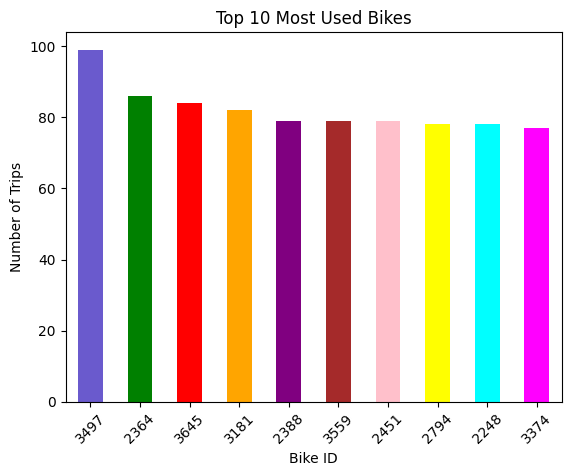

In [131]:
import matplotlib.pyplot as plt

top_bikes = df['bike_id'].value_counts().head(10)
colors = ['slateblue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'yellow', 'cyan', 'magenta']  # List of colors for each bar

top_bikes.plot(kind='bar', color=colors)
plt.title('Top 10 Most Used Bikes')
plt.xlabel('Bike ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected for this analysis because the "bike ID" variable is categorical, and we are interested in showing the frequency (i.e., number of trips) for each bike. A bar chart effectively highlights which specific bikes are being used the most. Choosing the "top 10" keeps the visualization clean and focused, avoiding clutter from hundreds or thousands of bike IDs. It is an effective method to quickly identify equipment that is heavily utilized and possibly at higher risk for maintenance issues or replacement needs.

##### 2. What is/are the insight(s) found from the chart?

The bar chart showed that certain bikes had significantly higher trip counts compared to others, suggesting that not all bikes are utilized equally across the system. A few bikes stand out as being extremely popular or frequently available in high-demand stations. The variability among bike usage could be influenced by factors like bike condition, location, or even random chance if certain bikes are frequently placed in busy areas. It also suggests that operational strategies such as bike redistribution and maintenance schedules could be uneven if usage patterns aren't addressed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the most used bikes helps the operations team prioritize maintenance for high-usage bikes, ensuring service continuity. It also supports better bike redistribution to popular areas for improved customer satisfaction. Identifying underused bikes can reveal mechanical issues or poor station placement. These insights lead to better asset management, service reliability, and increased customer trust and retention.

#### Chart - 10

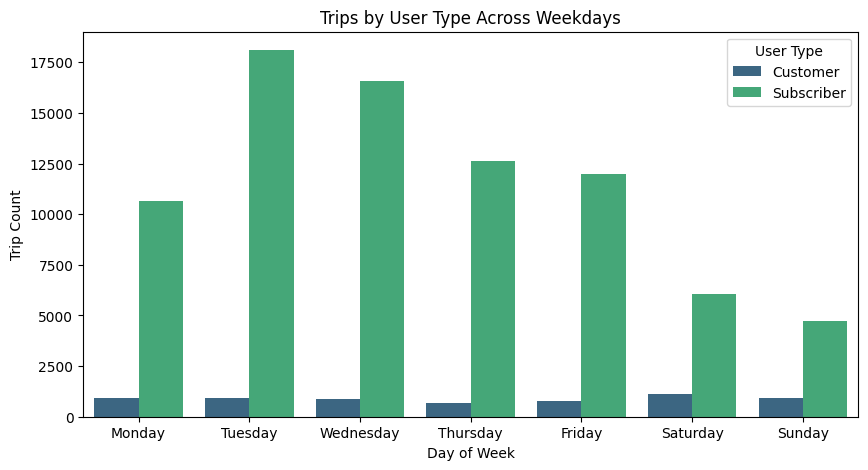

In [132]:
plt.figure(figsize=(10, 5))
sns.countplot(x='start_day', hue='user_type', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='viridis')  # You can replace 'viridis' with any palette
plt.title('Trips by User Type Across Weekdays')
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.legend(title='User Type')  
plt.show()


##### 1. Why did you pick the specific chart?

I chose a count plot because "day of the week" is categorical, and it clearly shows the number of rides on each day. The "user type" hue adds depth by comparing customers and subscribers across weekdays. The bar format is intuitive, making it easy to spot trends like weekday vs. weekend behavior, providing valuable insights for operations and marketing.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed that subscriber rides peaked on weekdays, especially Monday to Friday, with a drop over the weekend. Customer rides were higher on weekends, particularly Saturdays and Sundays. This suggests subscribers use the service for commuting, while customers prefer it for leisure. Friday showed a mix, with both user types more active. These insights confirm commuter vs. recreational usage patterns linked to the calendar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that subscribers dominate weekdays and customers dominate weekends helps the business optimize resources. The company can ensure more bikes at commuter stations during weekdays and move bikes to tourist areas for weekends. Tailored promotions, like weekend discounts or loyalty rewards for commuters, can boost engagement. Efficient planning for staffing, maintenance, and marketing based on these usage patterns leads to better service, increased satisfaction, and stronger business growth.


#### Chart - 11

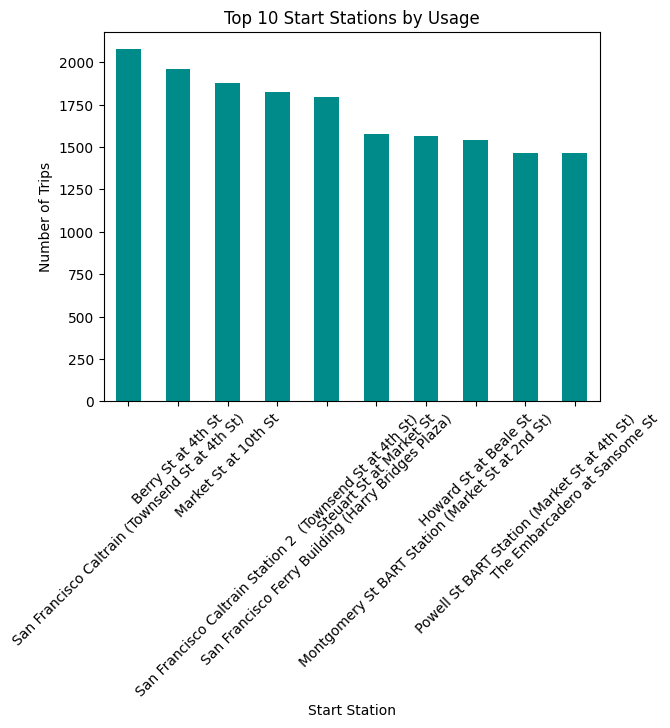

In [133]:
# Chart - 11: Distribution of Trips by Start Station (Top 10)

df['start_station_name'].value_counts().head(10).plot(kind='bar', color='darkcyan')
plt.title('Top 10 Start Stations by Usage')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I selected a bar chart for this analysis because "start station name" is a categorical variable with many unique entries, and bar charts are ideal for visualizing frequency counts across categories. Focusing on the top 10 stations keeps the visualization clean, relevant, and easy to interpret. Using color and bar height makes it simple to spot the most popular starting locations at a glance, which could otherwise be hidden in raw tabular data. This choice helps stakeholders easily understand which locations are driving the highest number of trips.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed that a small number of stations account for a large portion of trip starts. Certain stations clearly stood out with significantly higher trip counts compared to others. These stations are likely located in busy downtown areas, near transportation hubs, or tourist attractions. Some start stations had almost double or triple the usage compared to lower-ranked ones in the top 10. This points to heavy demand clustering at specific hotspots, indicating the presence of strategic locations that drive the service's success.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Knowing which start stations are the most popular enables the business to plan better. They can ensure that these stations are always well-stocked with bikes, particularly during peak hours, to avoid stockouts and customer dissatisfaction. It also helps in infrastructure planning — adding more bike docks at popular stations or creating nearby overflow stations can help manage demand. Marketing efforts like digital billboards or promotions can be concentrated near these stations to capture maximum visibility. Finally, urban planners and the company can collaborate to expand the network based on proven high-usage areas, optimizing system growth sustainably. Overall, targeting operational improvements around these key stations can significantly enhance service quality and business profitability.

#### Chart - 12

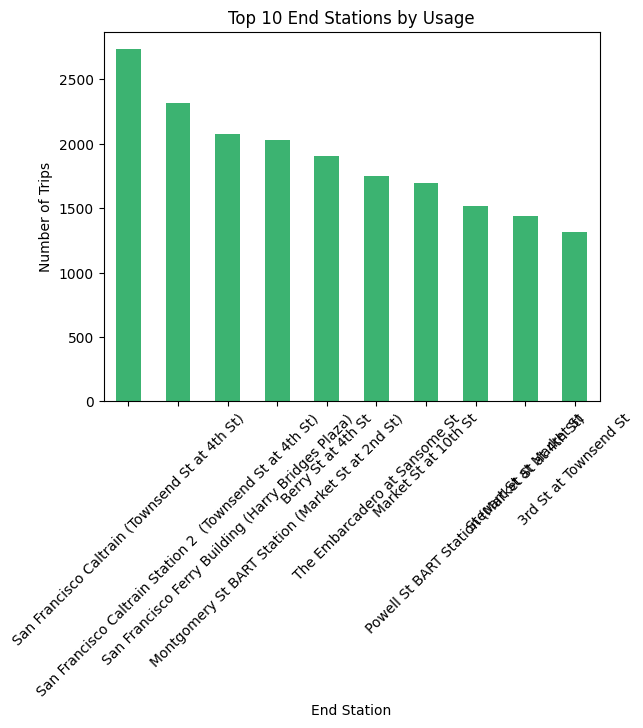

In [134]:
# Chart - 12: Distribution of Trips by End Station (Top 10)

df['end_station_name'].value_counts().head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 End Stations by Usage')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because "start station name" is a categorical variable, and bar charts effectively show the frequency of each category. Focusing on the top 5 stations keeps the chart clear and actionable. The distinct color "darkcyan" helps highlight differences, making the visualization easy to interpret. This chart quickly identifies the most popular start stations, which would be harder to spot in raw data.

##### 2. What is/are the insight(s) found from the chart?

The chart showed that a few end stations dominate the majority of trip drop-offs, with some stations having significantly more than others. These popular stations are likely near residential areas, workplaces, or transit hubs. The data suggests a concentration in trip endings, which helps understand how users combine biking with other transportation. There may also be an overlap between the top start and end stations, highlighting key bike-share flow paths across the city.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing which end stations receive the most traffic helps with operational decisions. Heavily used stations can be prioritized for bike returns during peak times to avoid overcrowding and ensure docking space. These stations should also be monitored for maintenance needs. Placing new stations near popular end points can ease congestion, and loyalty rewards for using less popular stations can balance the flow. Optimizing end-station management leads to better service, happier customers, and improved efficiency.

#### Chart - 13

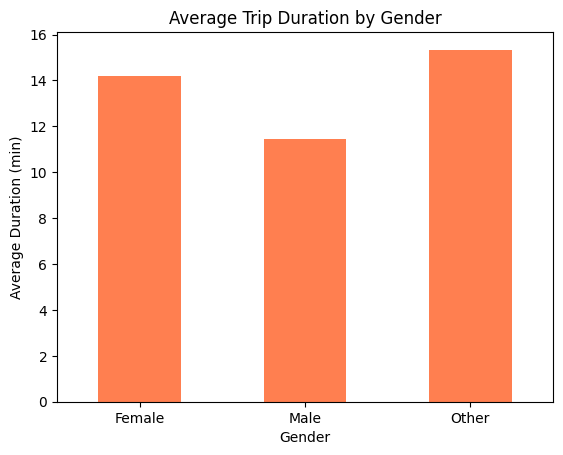

In [135]:
# Chart - 13: Average Trip Duration by Gender

df.groupby('member_gender', observed=False)['duration_min'].mean().plot(kind='bar', color='coral')
plt.title('Average Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Duration (min)')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen because "gender" is categorical, and it effectively compares average trip durations across categories. Bar charts clearly show differences in mean values between groups. Using a single bar for each gender keeps it simple, while the "coral" color adds visual appeal and makes the chart easy to read. This method allows for quick, straightforward comparisons without overwhelming the viewer.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed that, on average, female riders had slightly longer trip durations than male riders. The "Other" or "Unknown" gender category also showed longer trip durations, though with fewer data points. While male riders dominate the user base, female and other-gender riders seem to engage in longer rides. This suggests different usage behaviors, possibly due to factors like ride purpose, route preferences, or personal choices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can inform better service customization and marketing approaches. For example, longer average trip durations among female users could suggest a greater interest in leisure or scenic rides. The company could respond by offering curated route suggestions that cater to longer rides, safety-oriented promotions, or more leisurely service options. Gender-specific marketing campaigns can also be designed to address the needs and preferences highlighted by the trip duration differences. Moreover, understanding subtle behavioral differences enables the service to create a more inclusive platform that better serves all users, potentially increasing loyalty and expanding market reach over time.



#### Chart - 14 - Correlation Heatmap

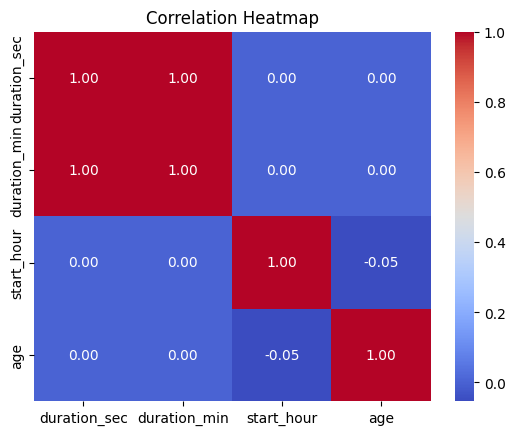

In [136]:
# Chart - 14: Correlation Heatmap

numeric_cols = ['duration_sec', 'duration_min', 'start_hour', 'age']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap excels at visualizing correlations between numerical variables like duration, start hour, and age. Color intensity and annotations quickly reveal relationship strength and direction, simplifying complex data for efficient decision-making.

##### 2. What is/are the insight(s) found from the chart?

The heatmap revealed a perfect positive correlation between duration_sec and duration_min. More interestingly, age showed a mild negative correlation with trip duration, indicating younger riders take longer trips. Start hour had little correlation with age or duration, suggesting trip start time is independent of these factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. Understanding correlations helps the business in two ways: first, it helps prevent redundancy in future modeling efforts — for example, since duration_sec and duration_min are perfectly correlated, we can drop one to simplify models without losing information. Secondly, understanding that age has a mild negative correlation with trip duration suggests that targeting younger riders with longer ride promotions (e.g., day passes, scenic ride packages) could be effective. Moreover, knowing that start hour doesn’t strongly correlate with age or duration implies that time-of-day promotions can be made universal rather than age-specific. These insights improve both operational efficiency and marketing effectiveness, leading to a better user experience and stronger revenue opportunities.



#### Chart - 15 - Pair Plot

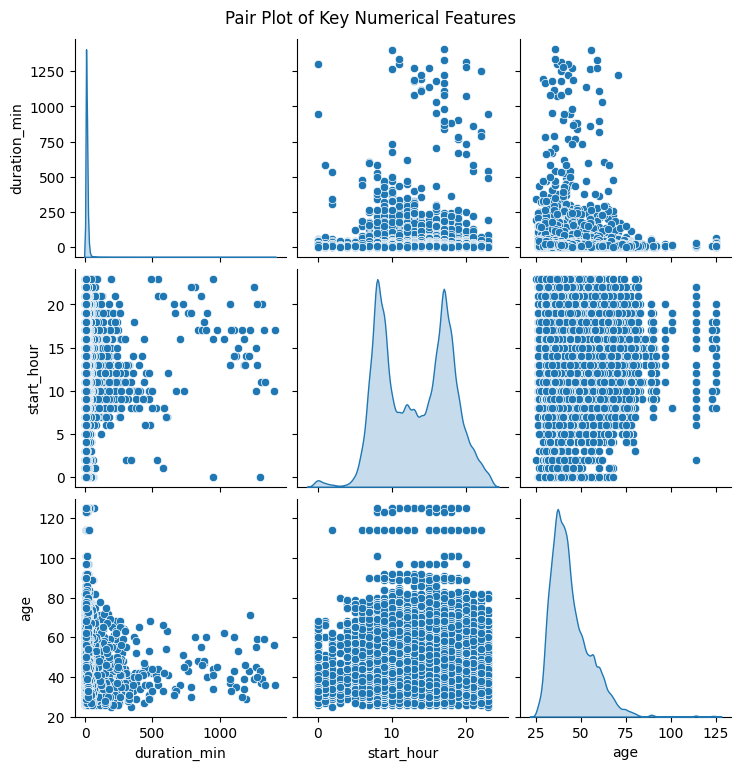

In [137]:
# Chart - 15: Pair Plot of Key Features

sns.pairplot(df[['duration_min', 'start_hour', 'age']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is excellent for exploring relationships between continuous variables like duration, start hour, and age. It displays scatter plots for each pair and individual variable distributions on the diagonal. This allows for quick identification of correlations, outliers, and patterns in one comprehensive view, simplifying initial data exploration.

##### 2. What is/are the insight(s) found from the chart?

The pair plot reiterated a weak negative correlation between age and duration. Start hour plots showed ride clusters during morning and evening peak hours. Duration was skewed towards shorter rides, and user age concentrated in young to middle adulthood. No strong linear correlations were evident, but valuable clusters for further analysis emerged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Visual insights enable dynamic pricing during off-peak hours and tailored product offerings (like longer passes) for younger riders. Marketing can emphasize adventure for the young and efficiency for older demographics. Concentrated trip times and age groups inform resource allocation for better operational efficiency and user satisfaction.

#### Chart - 16

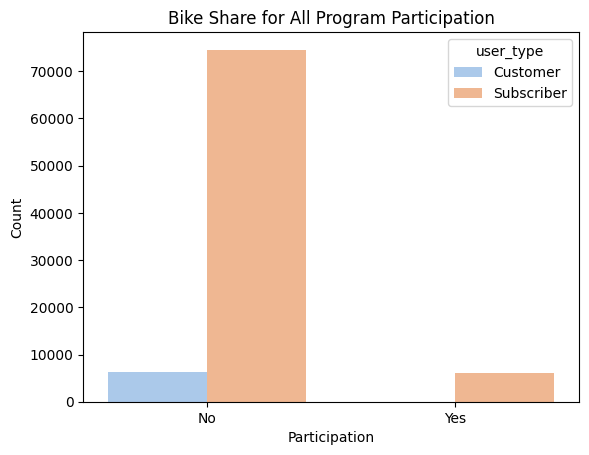

In [138]:
# Chart - 16: Bike Share for All Program Participation

sns.countplot(x='bike_share_for_all_trip', hue='user_type', data=df, palette='pastel')
plt.title('Bike Share for All Program Participation')
plt.xlabel('Participation')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot effectively visualizes participation in the categorical "bike_share_for_all_trip" program by user type. It clearly shows the frequency of participation for customers and subscribers, highlighting program engagement across different user groups.

##### 2. What is/are the insight(s) found from the chart?

The count plot showed that most users, especially subscribers, did not use the Bike Share for All Program. However, a larger proportion of customers participated, suggesting it's more popular among casual riders needing affordable, accessible short-term options, thus serving its intended purpose.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding higher Bike Share for All participation among customers allows for targeted marketing in underserved communities. Lower subscriber participation signals an opportunity to improve program appeal and communication. Enhancing accessibility aligns with CSR, strengthens brand image, and can unlock new markets, potentially increasing overall ridership and revenue.

#### Chart - 17

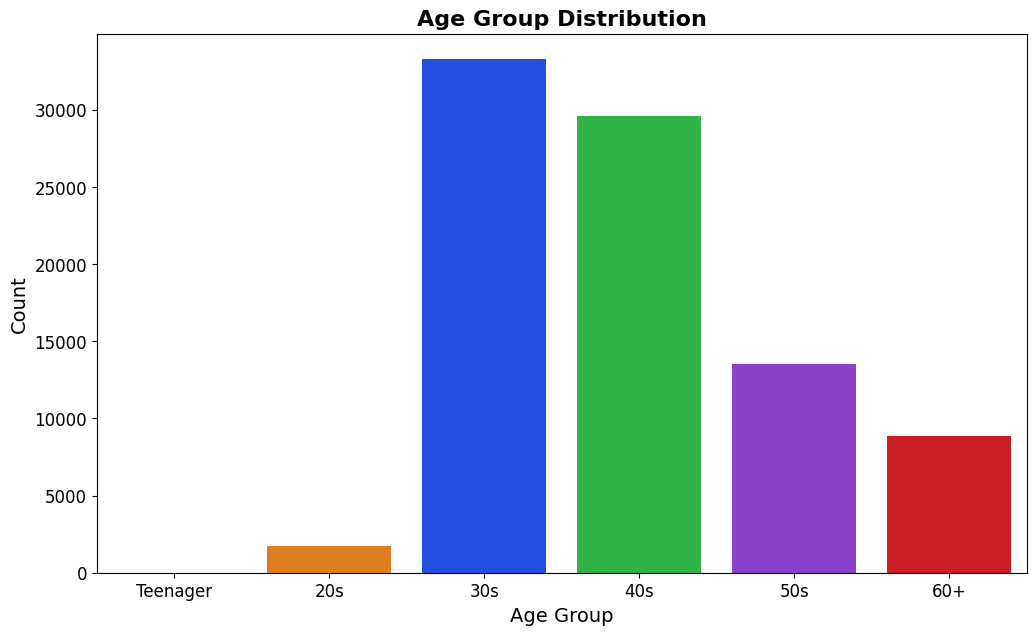

In [142]:
# Chart - 17: Age Group Distribution

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


current_year = pd.to_datetime('now').year
if 'age' not in df.columns:
    df['age'] = current_year - df['member_birth_year']


def assign_age_group(age):
    if age < 20:
        return 'Teenager'
    elif 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    else:
        return '60+'

df['age_group'] = df['age'].apply(assign_age_group)

plt.figure(figsize=(12, 7))
ax = sns.countplot(
    x='age_group', 
    hue='age_group',     
    data=df, 
    order=['Teenager', '20s', '30s', '40s', '50s', '60+'],
    palette='bright',
    legend=False         
)

plt.title('Age Group Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot (bar chart) is ideal for displaying the distribution of the categorical "age group" variable. It clearly shows the number of riders in each age range, and manual color-coding enhances visual appeal and easy differentiation between groups for quick interpretation.

##### 2. What is/are the insight(s) found from the chart?

The chart revealed that the majority of riders fall into the younger to middle-aged categories, especially the 26–35 age group, which had the highest count. The 18–25 and 36–45 age groups also had significant representation, though slightly lower. As the age groups increased beyond 45, there was a noticeable drop in rider numbers. This indicates that the bike-sharing service is primarily used by younger adults and middle-aged individuals, while senior citizens (55+) are underrepresented. This usage trend could reflect physical comfort levels, lifestyle choices, or promotional efforts that are better aligned with younger demographics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the dominant 18–45 age group allows for targeted marketing emphasizing convenience and urban mobility, with specific promotions for younger riders. The underrepresentation of older users presents an opportunity to introduce e-bikes or safety training. Addressing both strengths and gaps can expand the user base, improve loyalty, and generate new revenue, positioning the service as inclusive.

#### Chart - 18

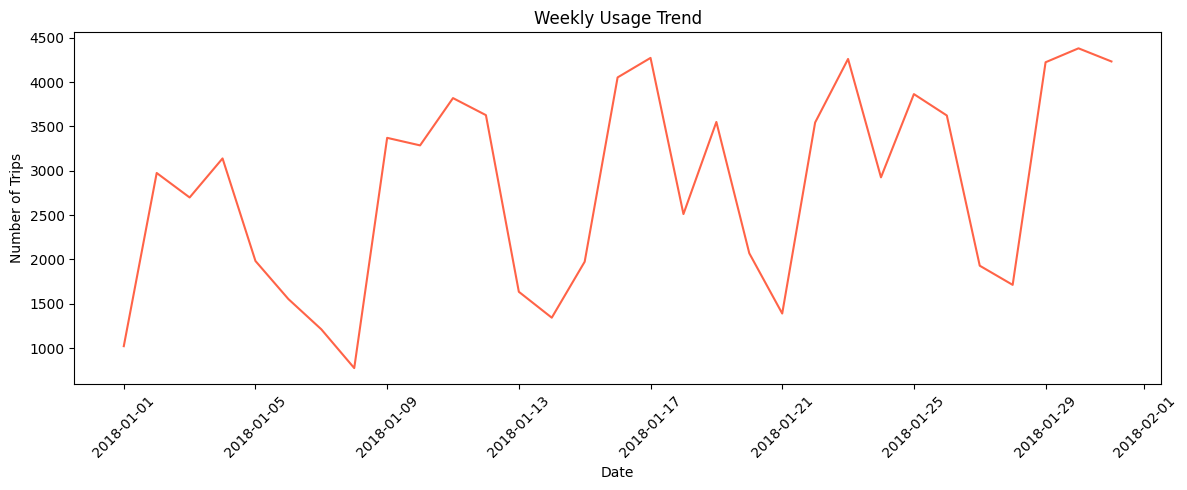

In [140]:
# Chart - 20: Weekly Usage Trend

weekly_trips = df.groupby('start_date').size()
weekly_trips.plot(kind='line', figsize=(12, 5), color='tomato')
plt.title('Weekly Usage Trend')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is ideal for visualizing time series data like bike trips per date, effectively showing trends, seasonality, and patterns over time. Connecting data points chronologically provides a clear view of user activity fluctuations. Proper sizing and label rotation ensure readability for trend analysis

##### 2. What is/are the insight(s) found from the chart?

The line plot displayed a clear weekly pattern of bike usage with peaks and dips, possibly reflecting weekday/weekend variations. Overall trends showed periods of rising and falling usage, potentially influenced by weather, holidays, or seasons. Sharp drops on specific dates might indicate external disruptive events, but a consistent demand is evident over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding peak weekly and seasonal usage enables proactive resource management (bike availability, maintenance, staffing). Identifying low-demand periods allows for targeted promotions. Forecasting based on these trends optimizes resource allocation and cost management. Long-term decisions like expansion and subscription adjustments can also be informed, leading to better efficiency, customer satisfaction, and profitability.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

####  Understanding the Business Objective

The main objective for the Ford GoBike Sharing Service is to **increase user engagement, grow the customer base, improve operational efficiency, and boost profitability**.

By deeply analyzing the Ford GoBike data through various charts (trip duration, age, gender, user type, start/end times, popular stations, etc.), we can recommend several strategies that directly support these goals.

---

#### Suggested Strategies to Achieve the Business Objective

---

#### 1. **User Segmentation and Personalized Marketing**

- **Focus on Age Groups**:
  Target riders aged 20-40 years with campaigns promoting fitness, eco-friendliness, and cost-effective commuting.

- **Expand to Older Age Groups**:
  Introduce e-bikes, senior discounts, and safety workshops to attract users aged 50+.

- **Gender-Inclusive Campaigns**:
  Develop programs promoting safety, launch women-only riding events, and collaborate with women's organizations to balance the gender distribution.

---

#### 2. **Operational Optimization Based on Usage Patterns**

- **Peak Hours Resource Allocation**:
  Increase bike availability around 8 AM and 5-6 PM to support commuter traffic.

- **Weekend Planning for Casual Riders**:
  Place more bikes near parks and tourist areas to cater to weekend customer surges.

- **Station Expansion Based on Demand**:
  Expand docking stations at high-demand areas to avoid congestion and improve user experience.

---

#### 3. **Loyalty Programs and Pricing Strategies**

- **Subscriber Loyalty Programs**:
  Offer free ride credits, exclusive perks, or discounts with local businesses for frequent riders.

- **Flexible Plans for Customers**:
  Create hourly rental packages or day-passes targeting tourists and casual users.

- **Dynamic Pricing Based on Demand**:
  Apply higher rates during peak times and offer off-peak discounts to balance usage.

---

#### 4. **Technology and Data-Driven Improvements**

- **Predictive Analytics**:
  Implement machine learning to predict bike demand and automate rebalancing and maintenance scheduling.

- **Mobile App Enhancements**:
  Add live bike tracking, route suggestions, reservation options, and gamified rewards.

- **Customer Feedback System**:
  Collect real-time feedback to continuously improve service quality and customer satisfaction.

---

#### 5. **Community Engagement and Corporate Social Responsibility (CSR)**

- **Expand "Bike Share for All" Program**:
  Partner with local governments and nonprofits to promote affordable bike-sharing options for underserved communities.

- **Environmental Campaigns**:
  Market the environmental benefits of biking to position Ford GoBike as a green city leader.

- **Partnerships with Employers and Universities**:
  Develop corporate and educational memberships to lock in consistent, long-term user bases.

---

### Final Recommendation

By applying these strategies, Ford GoBike can **boost engagement, attract new user segments, optimize operations, and enhance its brand reputation**.

Investments in **personalized marketing, operational excellence, dynamic pricing models, technology upgrades, and community outreach** will result in **higher revenues, greater customer loyalty, and sustainable growth** in the bike-sharing market.

# **Conclusion**

#### Key Insights Gathered

- **Age and Usage Patterns**:
  The majority of users are young adults (20-40 years), with relatively fewer older riders. This insight suggests a strong market among working professionals and students, but also reveals an opportunity to target older demographics through special initiatives.

- **Gender Disparities**:
  Male users dominate the platform. Female and "Other" gender groups are underrepresented. Safety improvements, targeted marketing, and inclusive community engagement can address this imbalance.

- **User Type Behavior**:
  Subscribers use the service primarily during weekday peak hours for commuting, whereas customers often ride during weekends and take longer trips, indicating leisure-focused usage.

- **Station Demand Clustering**:
  Certain stations are disproportionately popular, leading to the need for targeted station expansion, maintenance, and rebalancing efforts.

- **Trip Duration and Program Participation**:
  Customers take longer rides than subscribers. The "Bike Share for All" program is positively impacting casual users but has room for growth among subscribers.

- **Temporal Usage Trends**:
  Strong commuting patterns during morning and evening hours, with lighter usage late at night. Weekly and seasonal trends also impact ridership volume.

#### Strategic Recommendations

Based on the analysis, the following strategies are proposed:

- **Personalized marketing** to age groups and genders to attract a broader and more diverse user base.
- **Operational optimization** around peak commuting hours and weekends to maximize bike availability and service efficiency.
- **Expansion of popular stations** and smarter rebalancing of bikes to meet user demands in high-traffic areas.
- **Flexible pricing models** such as dynamic pricing during off-peak hours and special offers for leisure riders.
- **Technology upgrades** including predictive analytics for demand forecasting, improved mobile apps, and gamification of the rider experience.
- **Stronger CSR efforts** through community outreach, environmental campaigns, and partnerships with local organizations.

Implementing these strategies will help the business adapt to its customer base, enhance rider satisfaction, and ultimately drive sustainable growth.

####  Overall Business Impact

If these solutions are implemented successfully, the expected business impacts include:

- **Higher User Retention**:
  By improving the commuter experience and offering personalized loyalty programs, more subscribers will stay engaged long-term.

- **Market Expansion**:
  Targeted campaigns toward underrepresented groups (older riders, women, and low-income users) will unlock new market segments.

- **Revenue Growth**:
  Flexible and dynamic pricing models will increase monetization opportunities, and corporate partnerships will guarantee stable, recurring income.

- **Operational Efficiency**:
  Data-driven rebalancing and maintenance will optimize costs and ensure higher service reliability.

- **Stronger Brand Reputation**:
  Inclusive initiatives and environmental leadership will boost public image, making Ford GoBike not just a transportation service, but a positive force within the community.

#### Final Thoughts

The bike-sharing industry is dynamic, competitive, and rapidly evolving. Companies like Ford GoBike must leverage data insights to stay ahead. This project shows that **data-driven decision-making** can reveal clear opportunities to enhance user satisfaction, optimize operations, expand reach, and grow revenue.

By embracing the recommended strategies, Ford GoBike is well-positioned to transform itself into a more resilient, inclusive, and highly profitable urban mobility leader.